In [5]:
#import the modules required for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LinReg

In [6]:
#read in data
#provide encoding as latin1 to remediate bytes encoding error
#use the fips column as the index. fips is the census tract number
solar_df = pd.read_csv('deepsolar_tract.csv', engine = 'python', encoding = 'latin1', index_col = 'fips')

In [7]:
#look at the beginning of the data frame
solar_df.head()

,tile_count,solar_system_count,total_panel_area,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
fips,,,,,,,,,,,,,,,,,,,,,
27145011200,0,0,0.000000,70352.78987,Stearns County,569,1690,13,1757,336,...,39,11,13,34,0,0,25,12,0,9.46
27145011301,25,21,1133.436461,61727.08520,Stearns County,674,1434,108,767,222,...,39,11,13,34,0,0,25,12,0,9.46
27145011302,3,3,64.505776,71496.88658,Stearns County,854,1459,31,1541,289,...,39,11,13,34,0,0,25,12,0,9.46
27145011304,0,0,0.000000,86840.15275,Stearns County,640,1116,68,1095,231,...,39,11,13,34,0,0,25,12,0,9.46
27145011400,5,5,164.583303,89135.31560,Stearns County,654,1314,15,982,163,...,39,11,13,34,0,0,25,12,0,9.46


array([[<AxesSubplot:title={'center':'solar_system_count'}>]],
      dtype=object)

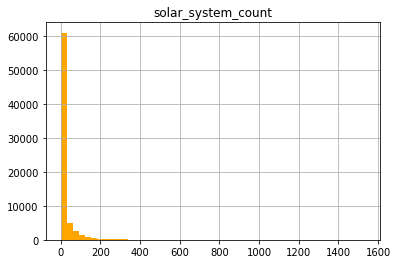

In [8]:
#create a histogram of the column solar_system_count
solar_df.hist(column = 'solar_system_count', color = 'orange', bins = 50)

array([[<AxesSubplot:title={'center':'solar_system_count'}>]],
      dtype=object)

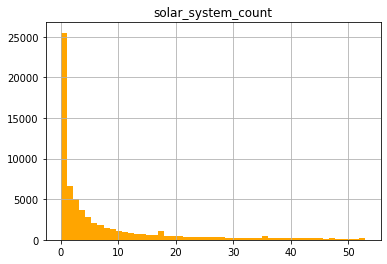

In [9]:
#creat a hisogram of the solar_system_count for all rows where solar_system_count < 90th percentile of solar_system_count
p90 = solar_df['solar_system_count'].quantile(q = 0.9)
solar_df[solar_df['solar_system_count'] < p90].hist(column = 'solar_system_count', color = 'orange', bins = 50)

array([[<AxesSubplot:title={'center':'solar_system_count'}>]],
      dtype=object)

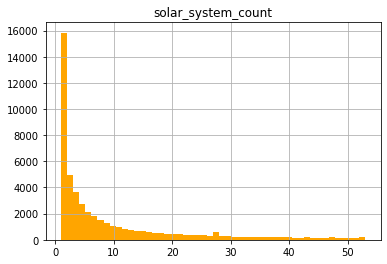

In [10]:
#create a histogram of the solar_system_count that is greater than the 10th percentile and less than the 90th percentile
p10 = solar_df['solar_system_count'].quantile(q = 0.1)
solar_df[((solar_df['solar_system_count'] < p90) & (solar_df['solar_system_count'] > p10))].hist(column = 'solar_system_count',\
                                                                                              color = 'orange', bins = 50)

In [11]:
#what is the max solar_system_count?
solar_df['solar_system_count'].max()

1535

In [12]:
#which fips is the max solar_system_count in?
solar_df['solar_system_count'].idxmax()

6107001003

In [13]:
#which county and state is the max solar_system_count in?
solar_df.loc[solar_df['solar_system_count'].idxmax(), ['county','state']]

county    Tulare County
state                ca
Name: 6107001003, dtype: object

In [14]:
#which county and state is the second largest solar_system_count in?
top_two = solar_df.nlargest(2, 'solar_system_count')
top_two.loc[top_two['solar_system_count'].idxmin(), ['county', 'state']]

county    San Diego County
state                   ca
Name: 6073017030, dtype: object

In [15]:
#which state has the most census tracts with 0 for solar_system_count?
no_solar_systems = solar_df[solar_df['solar_system_count'] == 0]
states_with_no_solar_systems = no_solar_systems['state'].value_counts()
states_with_no_solar_systems.idxmax()

'ny'

In [16]:
#group by state and find the sum of the solar system counts by state
state_count_series = solar_df.groupby(['state'])['solar_system_count'].sum()
state_count_series.idxmin()

'sd'

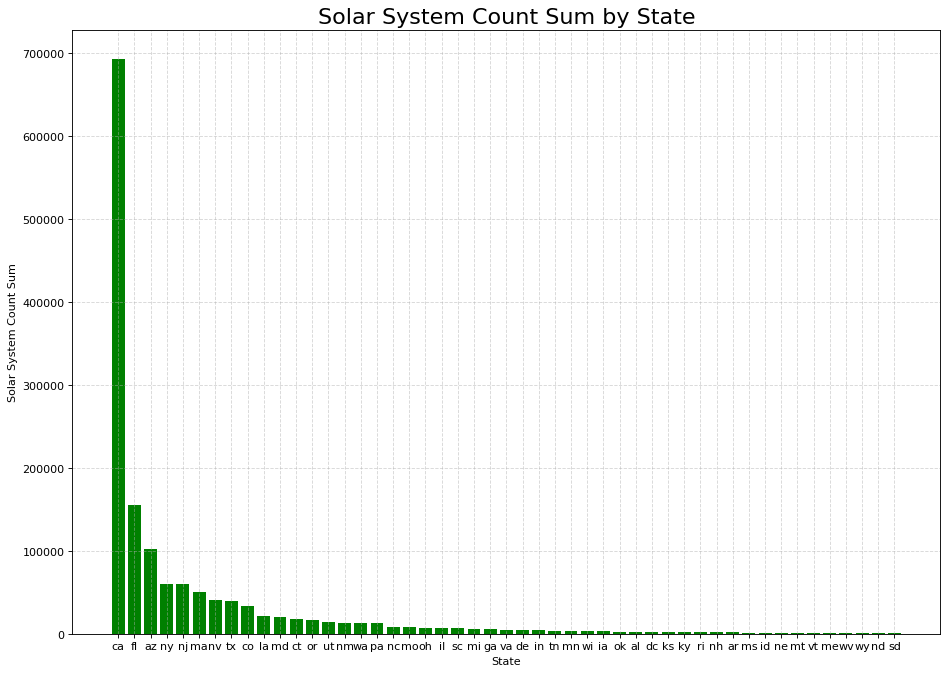

In [18]:
#create a bar graph of the sumar of the solar system counts by state

# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

#sort values
state_count_series.sort_values(inplace = True, ascending = False)
  
# Plotting the bars
plt.bar(state_count_series.index, state_count_series, color = 'green')
  
# Decorations
# Setting the labels of x-axis and y-axis
plt.gca().set(ylabel='Solar System Count Sum', xlabel='State')
  
# Title of Bar Chart
plt.title('Solar System Count Sum by State', fontdict={
          'size': 20})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the bar graph
plt.show()

In [19]:
#get the sum of solar_system_count and the average of average_household_income by state
state_df = solar_df.groupby(['state'])[['solar_system_count','average_household_income']].agg({'solar_system_count':'sum',
                                                                                               'average_household_income':'mean'})

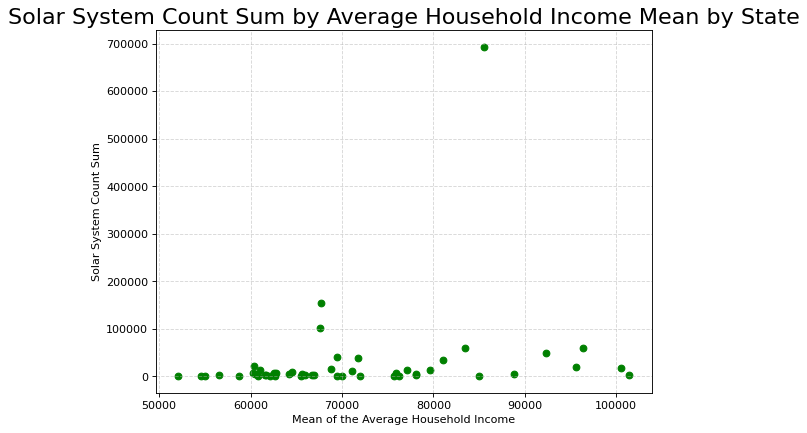

In [20]:
#plot the average average_household_income and sum of solar_system_count in a scatter plot

# Draw plot
plt.figure(figsize=(8, 6), dpi=80)
  
# Plotting the points
plt.scatter(state_df['average_household_income'], state_df['solar_system_count'], color = 'green')
  
# Decorations
# Setting the labels of x-axis and y-axis
plt.gca().set(ylabel='Solar System Count Sum', xlabel='Mean of the Average Household Income')
  
# Title of Bar Chart
plt.title('Solar System Count Sum by Average Household Income Mean by State', fontdict={
          'size': 20})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the scatter plot
plt.show()

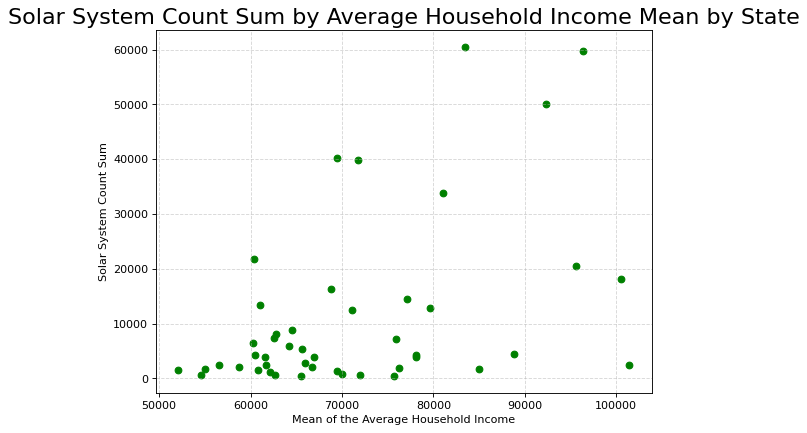

In [21]:
#now do the same thing, but without the top three states
state_df_reduced = state_df[~state_df.index.isin(['ca','fl','az'])]

# Draw plot
plt.figure(figsize=(8, 6), dpi=80)
  
# Plotting the points
plt.scatter(state_df_reduced['average_household_income'], state_df_reduced['solar_system_count'], color = 'green')
  
# Decorations
# Setting the labels of x-axis and y-axis
plt.gca().set(ylabel='Solar System Count Sum', xlabel='Mean of the Average Household Income')
  
# Title of Bar Chart
plt.title('Solar System Count Sum by Average Household Income Mean by State', fontdict={
          'size': 20})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the scatter plot
plt.show()

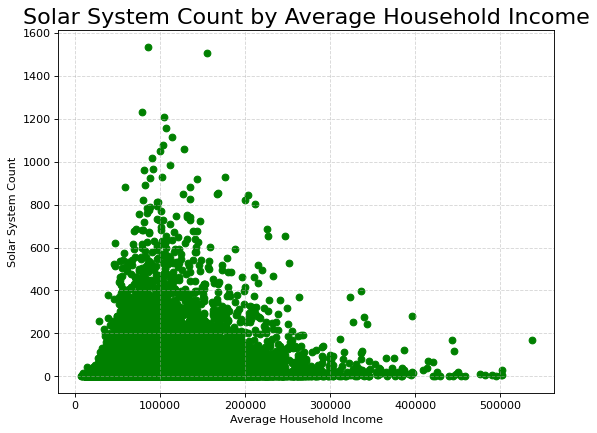

In [22]:
#create a scatter plot of solar_system_count versus average_household_income

# Draw plot
plt.figure(figsize=(8, 6), dpi=80)
  
# Plotting scatter points
plt.scatter(solar_df['average_household_income'], solar_df['solar_system_count'], color = 'green')
  
# Decorations
# Setting the labels of x-axis and y-axis
plt.gca().set(ylabel='Solar System Count', xlabel='Average Household Income')
  
# Title of Bar Chart
plt.title('Solar System Count by Average Household Income', fontdict={
          'size': 20})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the scatter plot
plt.show()

In [23]:
#find the state, county, and solar_system_count of the census tract with the highest average_household_income
solar_df.loc[solar_df['average_household_income'].idxmax(), ['county','state','solar_system_count']]

county                Los Angeles County
state                                 ca
solar_system_count                   170
Name: 6037700600, dtype: object

In [24]:
#find the state, county, and average_household_income of the census tract with the highest solar_system_count
solar_df.loc[solar_df['solar_system_count'].idxmax(), ['county','state','average_household_income']]

county                      Tulare County
state                                  ca
average_household_income      86340.03813
Name: 6107001003, dtype: object

In [25]:
#investigate the average_household_income column
solar_df['average_household_income'].describe()

count     71651.000000
mean      73314.418095
std       37650.268239
min        6910.984848
25%       49507.381085
50%       64270.939490
75%       86523.383305
max      537130.215800
Name: average_household_income, dtype: float64

In [26]:
#investigate the solar_system_count column
solar_df['solar_system_count'].describe()

count    72537.000000
mean        20.217958
std         54.229584
min          0.000000
25%          1.000000
50%          3.000000
75%         14.000000
max       1535.000000
Name: solar_system_count, dtype: float64

In [27]:
#create a linear regression model of solar_system_count on average_household_income
solar_df2 = solar_df.dropna(subset =['average_household_income'])
x = solar_df2['average_household_income'].to_numpy().reshape((-1,1))
y = solar_df2['solar_system_count'].to_numpy()
model = LinReg().fit(x, y)
model.score(x,y)

0.04901735451366862